In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

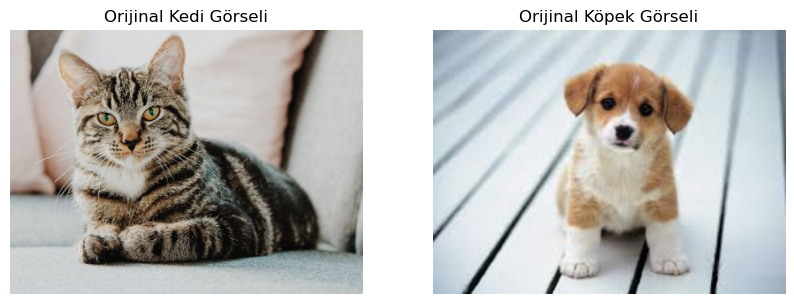

In [9]:
img1 = cv2.imread("kedi.jpg")
img2 = cv2.imread("kopek.jpg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Orijinal Kedi Görseli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img2)
plt.title("Orijinal Köpek Görseli")
plt.axis("off")

plt.show()


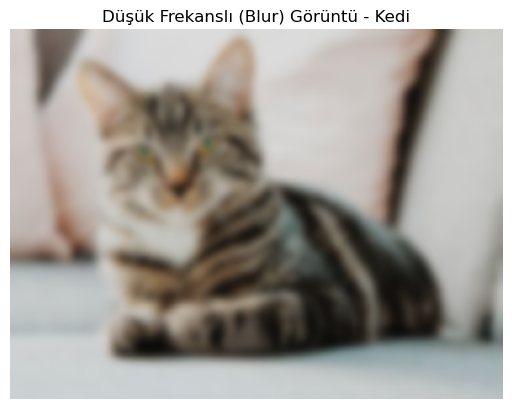

In [10]:
low_pass_img = cv2.GaussianBlur(img1, (21, 21), 0)

plt.imshow(low_pass_img)
plt.title("Düşük Frekanslı (Blur) Görüntü - Kedi")
plt.axis("off")
plt.show()


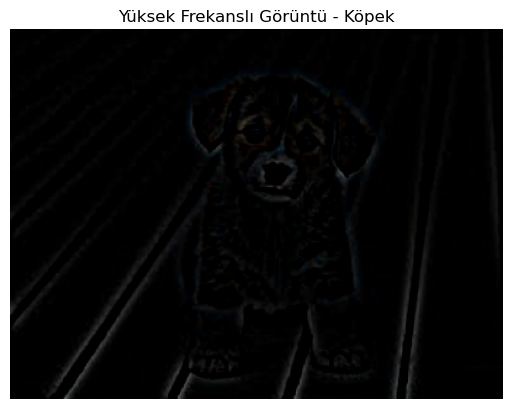

In [11]:
blurred_img2 = cv2.GaussianBlur(img2, (21, 21), 0)
high_pass_img = cv2.subtract(img2, blurred_img2)

plt.imshow(high_pass_img)
plt.title("Yüksek Frekanslı Görüntü - Köpek")
plt.axis("off")
plt.show()


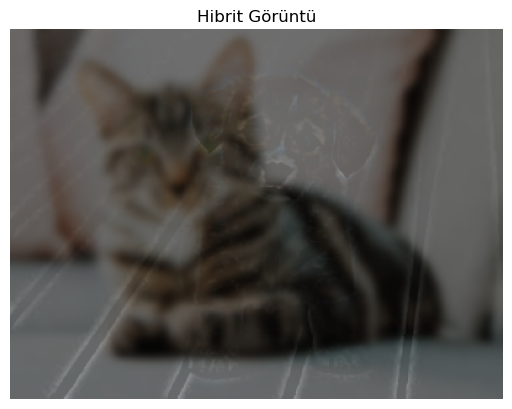

In [12]:
hybrid_img = cv2.addWeighted(low_pass_img.astype(np.float32), 0.5,
                             high_pass_img.astype(np.float32), 0.5, 0)
hybrid_img = np.clip(hybrid_img, 0, 255).astype(np.uint8)

plt.imshow(hybrid_img)
plt.title("Hibrit Görüntü")
plt.axis("off")
plt.show()

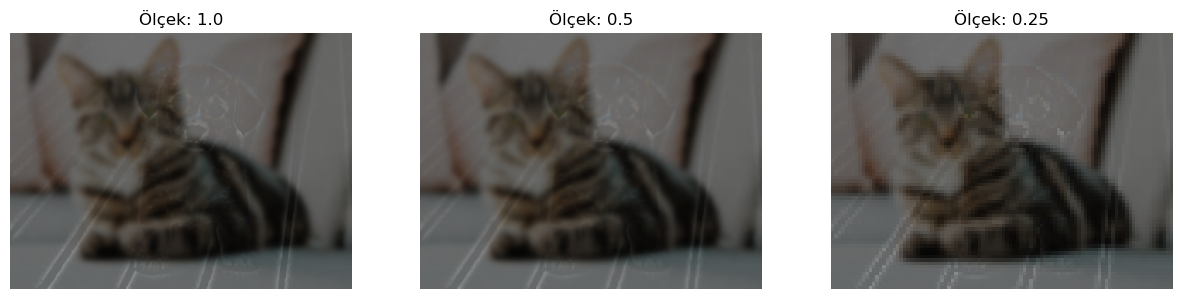

In [13]:
scales = [1.0, 0.5, 0.25]
plt.figure(figsize=(15,5))
for i, scale in enumerate(scales):
    resized = cv2.resize(hybrid_img, (0, 0), fx=scale, fy=scale)
    plt.subplot(1, len(scales), i+1)
    plt.imshow(resized)
    plt.title(f"Ölçek: {scale}")
    plt.axis("off")
plt.show()

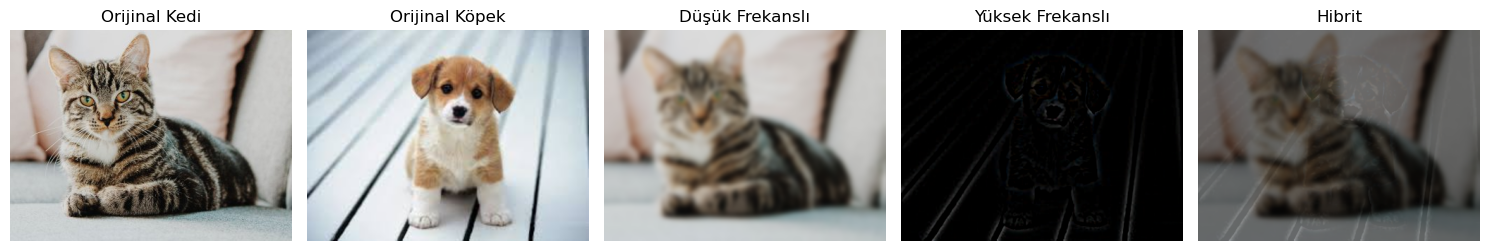

In [14]:
titles = ["Orijinal Kedi", "Orijinal Köpek", "Düşük Frekanslı", "Yüksek Frekanslı", "Hibrit"]
images = [img1, img2, low_pass_img, high_pass_img, hybrid_img]

plt.figure(figsize=(15,7))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()